In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from ipykernel import kernelapp as app
import matplotlib.pyplot as plt

In [ ]:
#import the dataset and list the first 5 rows.
df=pd.read_csv("/content/drive/MyDrive/DataVisualisation/project/bullyingInSchool.csv")
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

**Based on the overview, we can infer that some blank cells are present even though they weren't counted in the sum of null values. This might be due to the presence of white spaces in the data. Therefore, it's essential to clean these white spaces to ensure data integrity.**

In [ ]:
# Convert all whitespace and non-visible characters to NaN.
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN


<ipython-input-6-689269f81004>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)


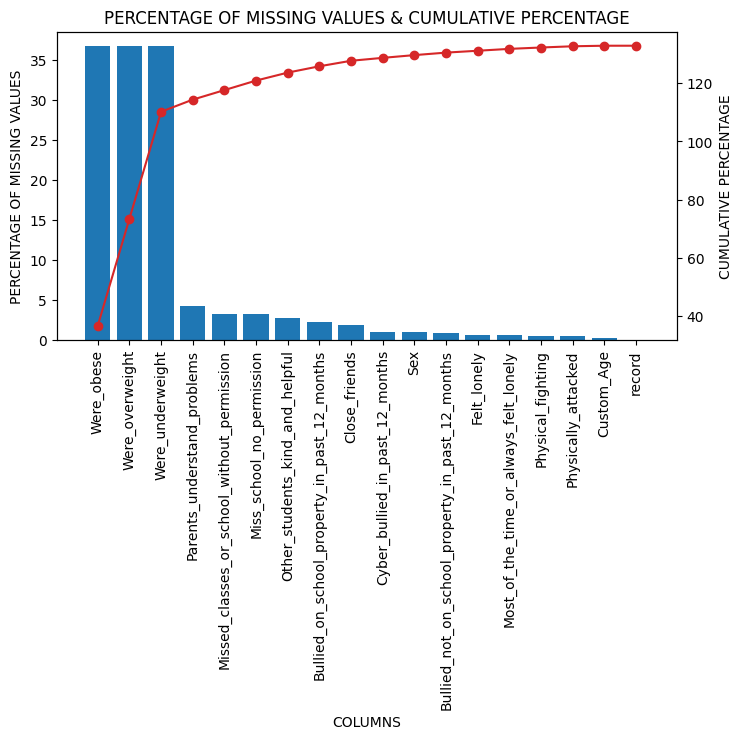

In [ ]:
# Calculate the percentage of missing values in each column
missing_perc = (df.isnull().sum() / len(df)) * 100
# Sort the columns by percentage of missing values in descending order
missing_perc_sorted = missing_perc.sort_values(ascending=False)
# Calculate the cumulative percentage of missing values
cumulative_perc = missing_perc_sorted.cumsum()
# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.bar(missing_perc_sorted.index, missing_perc_sorted.values)
ax1.set_xlabel('COLUMNS')
ax1.set_ylabel('PERCENTAGE OF MISSING VALUES')
ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)
ax2 = ax1.twinx()
ax2.plot(missing_perc_sorted.index, cumulative_perc.values, color='tab:red', marker='o')
ax2.set_ylabel('CUMULATIVE PERCENTAGE')
plt.title('PERCENTAGE OF MISSING VALUES & CUMULATIVE PERCENTAGE')
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.show()

**Were_underweight, Were_overweight, and Were_obese have the highest number of missing values at over 35%. Although imputing is possible, it could skew the model, so I'm dropping them.**


In [ ]:
# As discussed, drop columns with a high proportion of missing values
# Get the actual column names from the DataFrame
columns_to_drop = ['Were_underweight', 'Were_overweight', 'Were_obese']
existing_columns = df.columns.tolist()
# Filter the columns to drop to only those that exist in the DataFrame
valid_columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
# Drop the valid columns
df.drop(valid_columns_to_drop, axis=1, inplace=True)
#dropping Na values
df = df.dropna()

In [ ]:
# Get the count of non-null values for each column and check if all columns have the same count of non-null values
non_null_counts = df.count()
if non_null_counts.nunique() == 1:
    print("Count of null values:", df.isnull().sum().sum())
else:
    print("Columns have different counts of non-null values.")

Count of null values: 0


In [ ]:
# Save the DataFrame to a new CSV file and list the new, cleaned data set.
df.to_csv('/content/drive/MyDrive/DataVisualisation/project/bullyingInSchool_cleaned.csv', index=False)
df=pd.read_csv("/content/drive/MyDrive/DataVisualisation/project/bullyingInSchool_cleaned.csv")
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission
0,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No
1,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No
2,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No
3,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No
4,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No


<ipython-input-10-689269f81004>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)


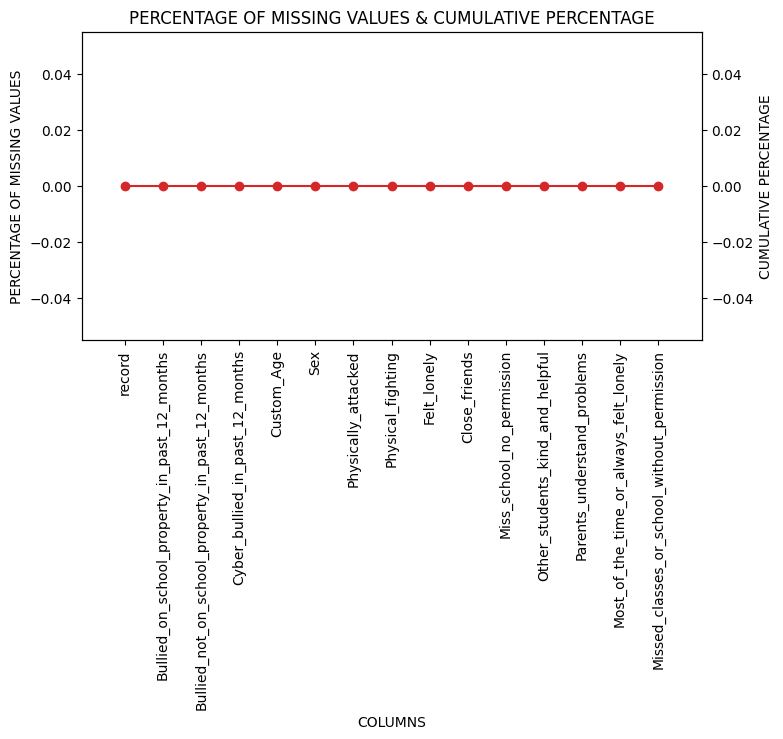

In [ ]:
# Calculate the percentage of missing values in each column
missing_perc = (df.isnull().sum() / len(df)) * 100
# Sort the columns by percentage of missing values in descending order
missing_perc_sorted = missing_perc.sort_values(ascending=False)
# Calculate the cumulative percentage of missing values
cumulative_perc = missing_perc_sorted.cumsum()
# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.bar(missing_perc_sorted.index, missing_perc_sorted.values)
ax1.set_xlabel('COLUMNS')
ax1.set_ylabel('PERCENTAGE OF MISSING VALUES')
ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)
ax2 = ax1.twinx()
ax2.plot(missing_perc_sorted.index, cumulative_perc.values, color='tab:red', marker='o')
ax2.set_ylabel('CUMULATIVE PERCENTAGE')
plt.title('PERCENTAGE OF MISSING VALUES & CUMULATIVE PERCENTAGE')
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.show()

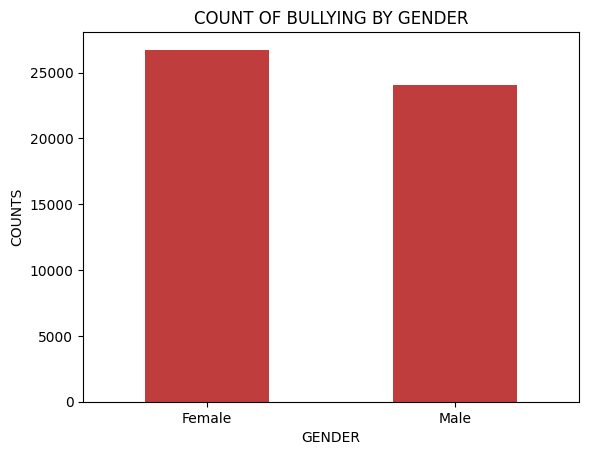

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/DataVisualisation/project/bullyingInSchool_cleaned.csv')

# Create the countplot with red bars
ax = sns.countplot(x='Sex', data=df, color='tab:red', width=0.5)

# Set labels and title
ax.set_xlabel("GENDER")
ax.set_ylabel("COUNTS")
ax.set_title("COUNT OF BULLYING BY GENDER")

plt.show()

/usr/local/lib/python3.10/dist-packages/plotnine/_mpl/utils.py:23: UserWarning: Glyph 9 (	) missing from current font.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:687: UserWarning: Glyph 9 (	) missing from current font.


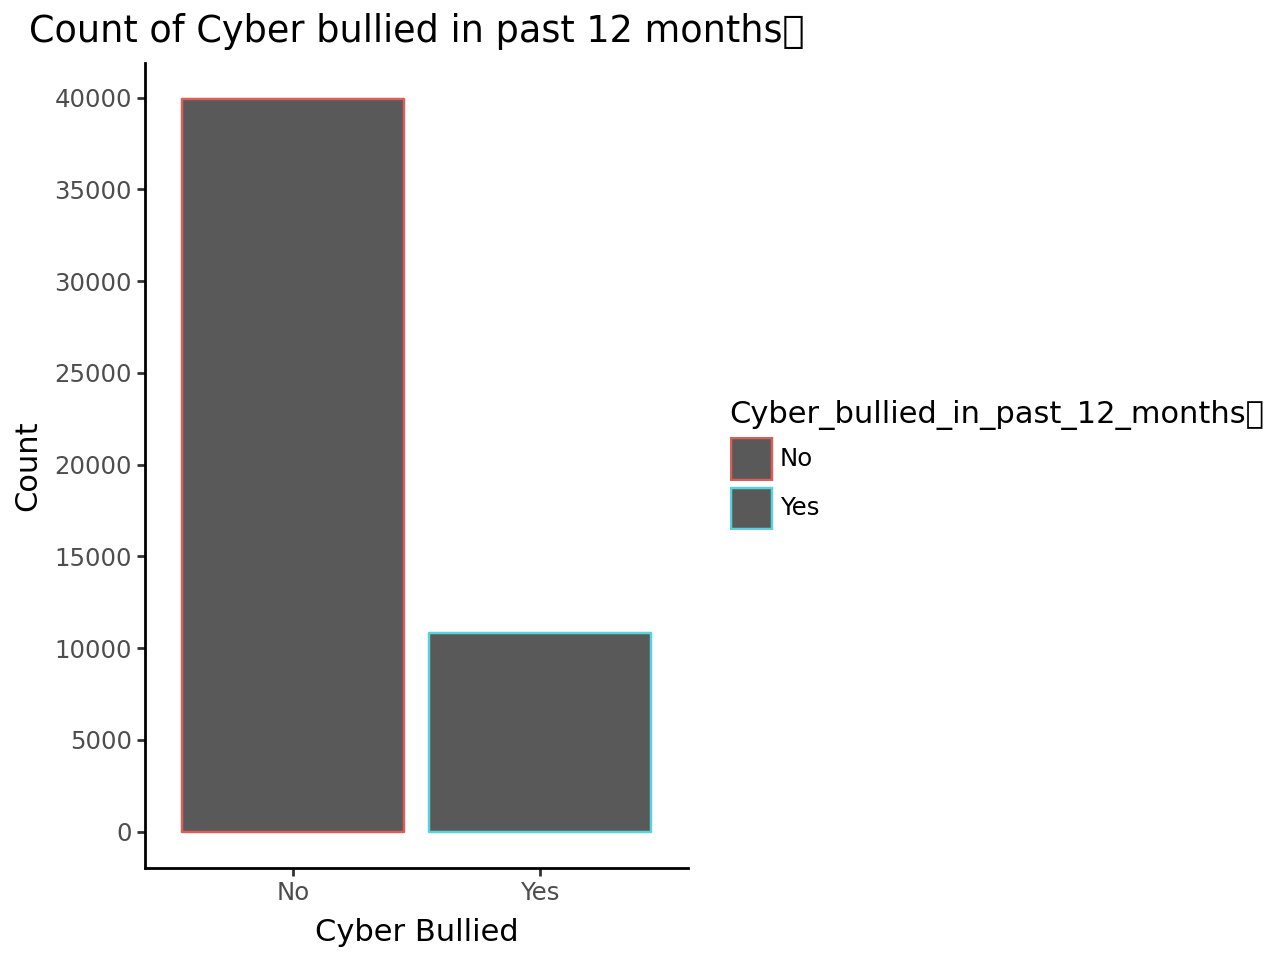

In [ ]:
!pip install plotnine
from plotnine import *
(ggplot(data=df,
           mapping=aes(x='Cyber_bullied_in_past_12_months	' ,color='Cyber_bullied_in_past_12_months	', width=0.5))
+ geom_bar()
+ ggtitle("Count of Cyber bullied in past 12 months")
+ xlab("Cyber Bullied")
+ ylab("Count")
+ theme_classic()
+ scale_y_continuous(breaks=range(0, int(df['Cyber_bullied_in_past_12_months'].value_counts().max()) + 5000, 5000))  # Increment by 5000
)

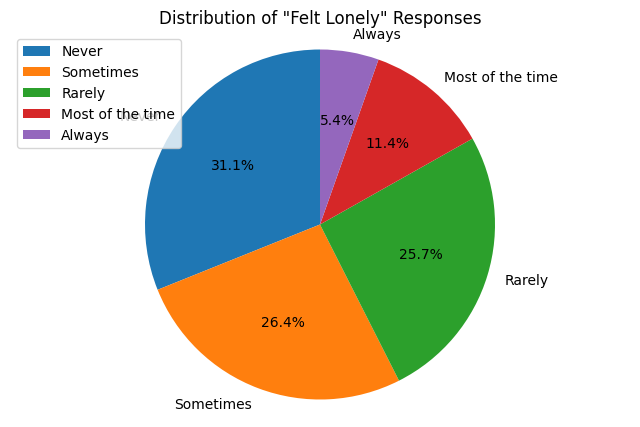

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Assuming 'df' is your DataFrame and 'Felt_lonely' is a column
felt_lonely_counts = df['Felt_lonely'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
plt.pie(felt_lonely_counts, labels=felt_lonely_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of "Felt Lonely" Responses')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.legend(felt_lonely_counts.index, loc="best")  # loc="best" finds the best position for the legend

plt.show()

Unique classes in y_train: ['0 times' '1 time' '4 or 5 times' '12 or more times' '6 or 7 times'
 '2 or 3 times' '10 or 11 times' '8 or 9 times']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.7726332381046203


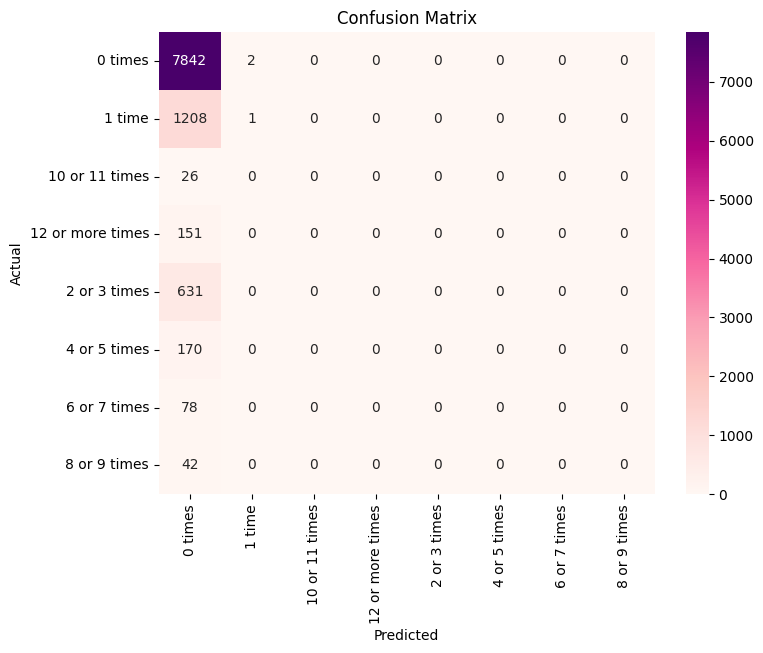

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
# Define features (X) and target variable (y)
X = df.drop('Physical_fighting', axis=1)
y = df['Physical_fighting']
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Check if y_train contains both classes
print(f"Unique classes in y_train: {y_train.unique()}")
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()